In [1]:
import pandas as pd

In [2]:
br = pd.read_csv('./borrower_table.csv')

In [3]:
br.head(10)

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
0,289774,1,NaN,NaN,8000,0.49,3285,1073,0,0,47,3
1,482590,0,1.0,0.0,4500,1.03,636,5299,1,13500,33,1
2,135565,1,NaN,NaN,6900,0.82,2085,3422,1,24500,38,8
3,207797,0,1.0,0.0,1200,0.82,358,3388,0,0,24,1
4,828078,0,0.0,0.0,6900,0.80,2138,4282,1,18100,36,1
5,423171,1,NaN,NaN,6100,0.53,6163,5298,1,29500,24,1
6,568977,1,NaN,NaN,600,0.89,305,1456,0,0,50,2
7,200139,1,NaN,NaN,4000,0.57,602,2757,1,31700,36,8
8,991294,0,1.0,0.0,7000,0.52,2575,2917,1,58900,33,3
9,875332,0,1.0,0.0,4300,0.83,722,892,1,5400,32,7


In [4]:
ln = pd.read_csv('./loan_table.csv')

In [5]:
ln.head(10)

,loan_id,loan_purpose,date,loan_granted,loan_repaid
0,19454,investment,2012-03-15,0,NaN
1,496811,investment,2012-01-17,0,NaN
2,929493,other,2012-02-09,0,NaN
3,580653,other,2012-06-27,1,1.0
4,172419,business,2012-05-21,1,0.0
5,77085,other,2012-08-31,0,NaN
6,780070,business,2012-03-14,1,1.0
7,303138,emergency_funds,2012-08-31,1,0.0
8,91475,investment,2012-05-25,1,1.0
9,422392,business,2012-10-25,0,NaN


In [6]:
print('There are {0} rows in total.'.format(len(ln)))
sum(ln['loan_repaid'].isnull())/len(ln)

There are 101100 rows in total.


0.5286449060336301

In [7]:
cb = ln.join(br.set_index('loan_id'), on='loan_id')

In [8]:
import numpy as np
mask = cb['loan_repaid'].isnull()
cb = cb[~mask]

In [9]:
cb.head(5)

,loan_id,loan_purpose,date,loan_granted,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
3,580653,other,2012-06-27,1,1.0,0,1.0,0.0,5400,0.52,3345,2764,1,15800,58,4
4,172419,business,2012-05-21,1,0.0,1,NaN,NaN,2900,0.76,1050,3695,1,34800,31,4
6,780070,business,2012-03-14,1,1.0,0,1.0,0.0,7800,0.30,4206,4368,1,51100,51,2
7,303138,emergency_funds,2012-08-31,1,0.0,0,0.0,1.0,4300,1.02,886,1597,1,15000,59,2
8,91475,investment,2012-05-25,1,1.0,0,1.0,0.0,3900,0.65,1837,3795,1,12000,24,1


In [10]:
# Get the label of each row so we can use supervised learning
cb['label'] = cb['loan_repaid']

In [11]:
cb.head(3)

,loan_id,loan_purpose,date,loan_granted,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,label
3,580653,other,2012-06-27,1,1.0,0,1.0,0.0,5400,0.52,3345,2764,1,15800,58,4,1.0
4,172419,business,2012-05-21,1,0.0,1,NaN,NaN,2900,0.76,1050,3695,1,34800,31,4,0.0
6,780070,business,2012-03-14,1,1.0,0,1.0,0.0,7800,0.30,4206,4368,1,51100,51,2,1.0


In [12]:
print(type(cb['loan_purpose']))
print(set(cb['loan_purpose'].to_list()))

<class 'pandas.core.series.Series'>
{'other', 'investment', 'business', 'home', 'emergency_funds'}


In [13]:
all_columns = cb.columns.difference(['date'])

cb_dummy = pd.get_dummies(cb[all_columns])

In [14]:
cb_dummy.describe()

,age,avg_percentage_credit_card_limit_used_last_year,checking_amount,currently_repaying_other_loans,dependent_number,fully_repaid_previous_loans,is_employed,is_first_loan,label,loan_granted,loan_id,loan_repaid,saving_amount,total_credit_card_limit,yearly_salary,loan_purpose_business,loan_purpose_emergency_funds,loan_purpose_home,loan_purpose_investment,loan_purpose_other
count,47654.000000,46751.000000,47654.000000,21865.000000,47654.000000,21865.000000,47654.000000,47654.000000,47654.000000,47654.0,47654.000000,47654.000000,47654.000000,47654.000000,47654.000000,47654.000000,47654.000000,47654.000000,47654.000000,47654.000000
mean,41.524657,0.700091,3499.160595,0.297736,3.752445,0.902493,0.909829,0.541172,0.644353,1.0,500187.775402,0.644353,2022.366580,4527.848659,29245.991942,0.226067,0.162694,0.243715,0.222500,0.145025
std,12.817587,0.177729,2155.128304,0.457273,2.621351,0.296654,0.286429,0.498307,0.478714,0.0,288925.682009,0.478714,1493.410303,1975.127016,16286.512395,0.418287,0.369090,0.429327,0.415929,0.352129
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.580000,1873.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.0,248669.250000,0.000000,914.000000,3100.000000,18900.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41.000000,0.710000,3024.500000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.0,500013.500000,1.000000,1553.000000,4400.000000,29400.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,50.000000,0.830000,4842.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.0,750413.250000,1.000000,2878.000000,5800.000000,40200.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,79.000000,1.090000,13165.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.0,999968.000000,1.000000,10641.000000,13500.000000,97200.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
cb_imp = cb_dummy.fillna(cb_dummy.mean())
cb_imp.head(5)

,age,avg_percentage_credit_card_limit_used_last_year,checking_amount,currently_repaying_other_loans,dependent_number,fully_repaid_previous_loans,is_employed,is_first_loan,label,loan_granted,loan_id,loan_repaid,saving_amount,total_credit_card_limit,yearly_salary,loan_purpose_business,loan_purpose_emergency_funds,loan_purpose_home,loan_purpose_investment,loan_purpose_other
3,58,0.52,2764,0.000000,4,1.000000,1,0,1.0,1,580653,1.0,3345,5400,15800,0,0,0,0,1
4,31,0.76,3695,0.297736,4,0.902493,1,1,0.0,1,172419,0.0,1050,2900,34800,1,0,0,0,0
6,51,0.30,4368,0.000000,2,1.000000,1,0,1.0,1,780070,1.0,4206,7800,51100,1,0,0,0,0
7,59,1.02,1597,1.000000,2,0.000000,1,0,0.0,1,303138,0.0,886,4300,15000,0,1,0,0,0
8,24,0.65,3795,0.000000,1,1.000000,1,0,1.0,1,91475,1.0,1837,3900,12000,0,0,0,1,0


In [16]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


def random_forest_model(X_train, y_train):
    model_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

    model_rf.fit(X_train, y_train)

    return model_rf

def logistic_reg_model(X_train, y_train):
    model_lr = LogisticRegression(solver='lbfgs', max_iter=300, penalty='l2')

    model_lr.fit(X_train, y_train)

    return model_lr

def model_evaluation(trained_model, X_test, y_test):
    score = trained_model.score(X_test, y_test)
    y_pred = trained_model.predict(X_test)
    pre_recal_fscore = metrics.precision_recall_fscore_support(y_test, y_pred, average='binary')

    return {'Model': trained_model.__class__, 'Score': score, 'Precision': pre_recal_fscore[0],
            'Recall': pre_recal_fscore[1], 'F1_score': pre_recal_fscore[2]}

In [17]:
# Do some EDA
num_cols = cb_imp.columns.difference(['loan_id','loan_granted', 'loan_repaid'])

predictors = num_cols.difference(['label', 'is_first_loan', 'is_employed'])

# normalize columns of predictors
cb_imp[predictors] = (cb_imp[predictors] - cb_imp[predictors].mean()) / cb_imp[predictors].std()
cb_imp.head(5)

,age,avg_percentage_credit_card_limit_used_last_year,checking_amount,currently_repaying_other_loans,dependent_number,fully_repaid_previous_loans,is_employed,is_first_loan,label,loan_granted,loan_id,loan_repaid,saving_amount,total_credit_card_limit,yearly_salary,loan_purpose_business,loan_purpose_emergency_funds,loan_purpose_home,loan_purpose_investment,loan_purpose_other
3,1.285370,-1.023031,-0.341121,-9.612491e-01,0.094438,4.852521e-01,1,0,1.0,1,580653,1.0,0.885646,0.441567,-0.825591,-0.540459,-0.440797,-0.567667,-0.534946,2.428016
4,-0.821111,0.340320,0.090871,-2.804782e-13,0.094438,1.522717e-12,1,1,0.0,1,172419,0.0,-0.651105,-0.824174,0.341019,1.850242,-0.440797,-0.567667,-0.534946,-0.411850
6,0.739245,-2.272770,0.403150,-9.612491e-01,-0.668527,4.852521e-01,1,0,1.0,1,780070,1.0,1.462179,1.656679,1.341847,1.850242,-0.440797,-0.567667,-0.534946,-0.411850
7,1.363388,1.817284,-0.882621,2.267278e+00,-0.668527,-4.491313e+00,1,0,0.0,1,303138,0.0,-0.760921,-0.115359,-0.874711,-0.540459,2.268571,-0.567667,-0.534946,-0.411850
8,-1.367235,-0.284549,0.137272,-9.612491e-01,-1.050010,4.852521e-01,1,0,1.0,1,91475,1.0,-0.124123,-0.317878,-1.058913,-0.540459,-0.440797,-0.567667,1.869309,-0.411850


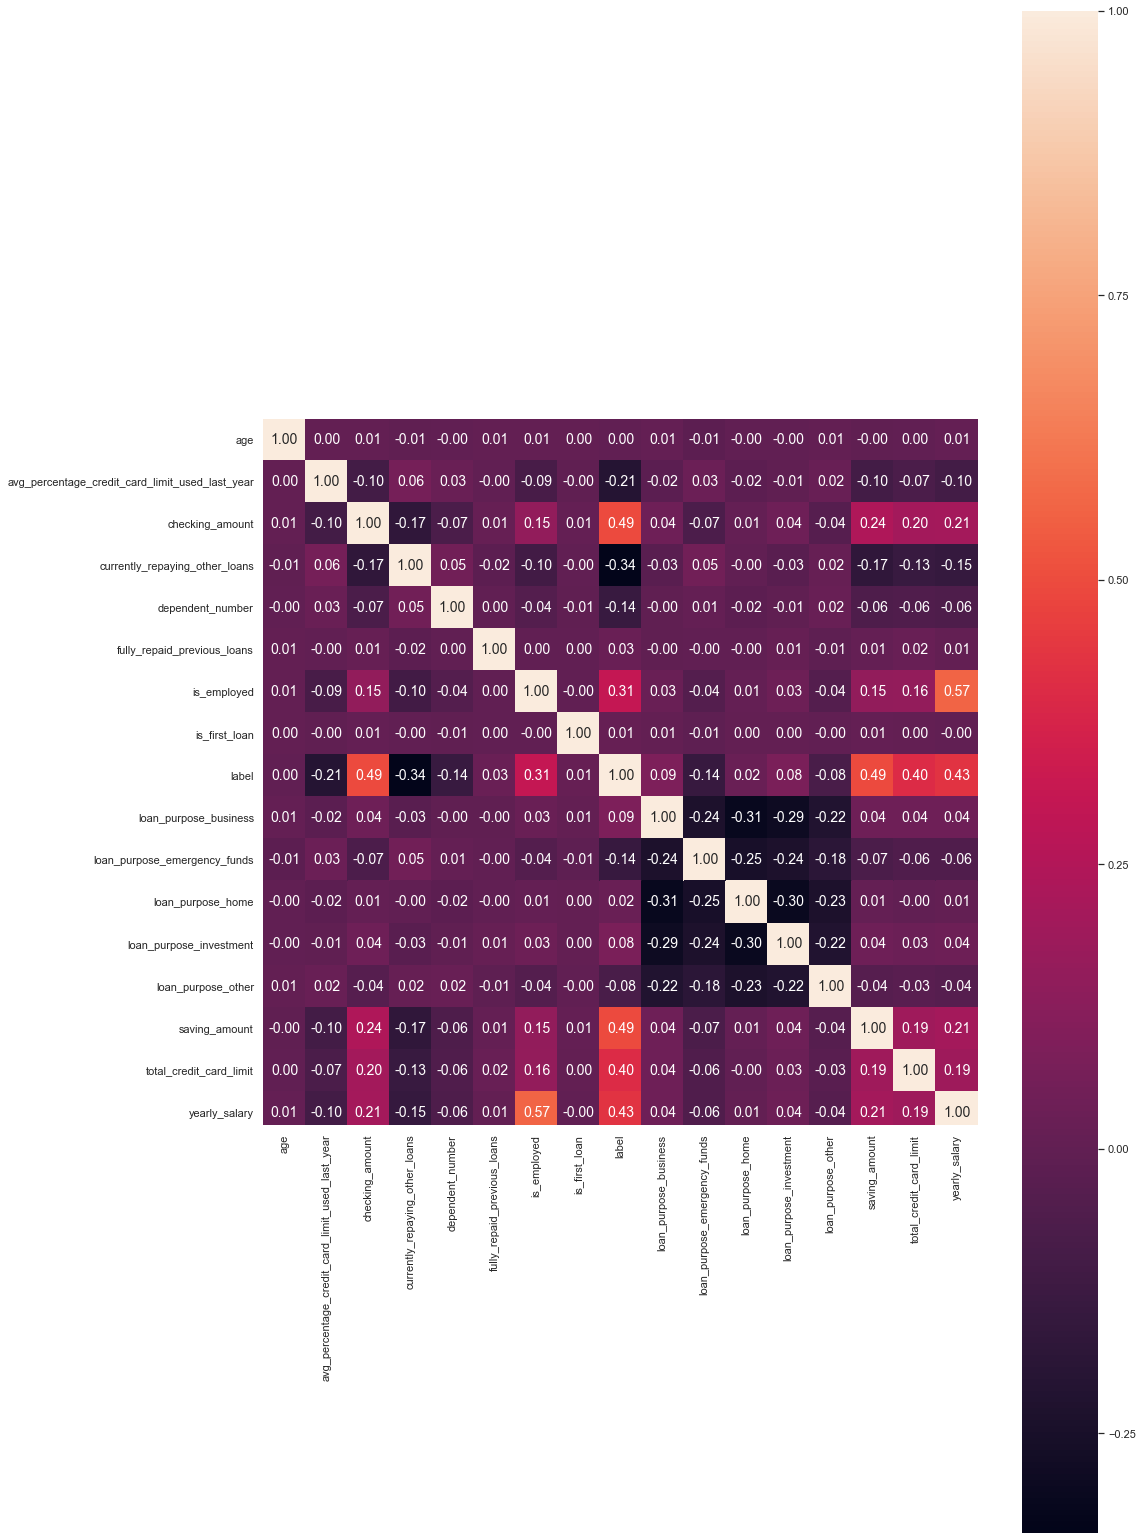

In [45]:
# plot a heatmap of correlation coefficient matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 28))

cm = np.corrcoef(cb_imp[num_cols].values.T)
sns.set(font_scale=1)
sns.heatmap(cm,
            cbar=True,
            annot=True,
            square=True,
            fmt='.2f',
            annot_kws={'size': 14},
            yticklabels=num_cols,
            xticklabels=num_cols,
            )
ax = plt.gca()
ax.set_ylim(len(num_cols)-0.2, 0)
plt.show()


/Users/bozhang/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/bozhang/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


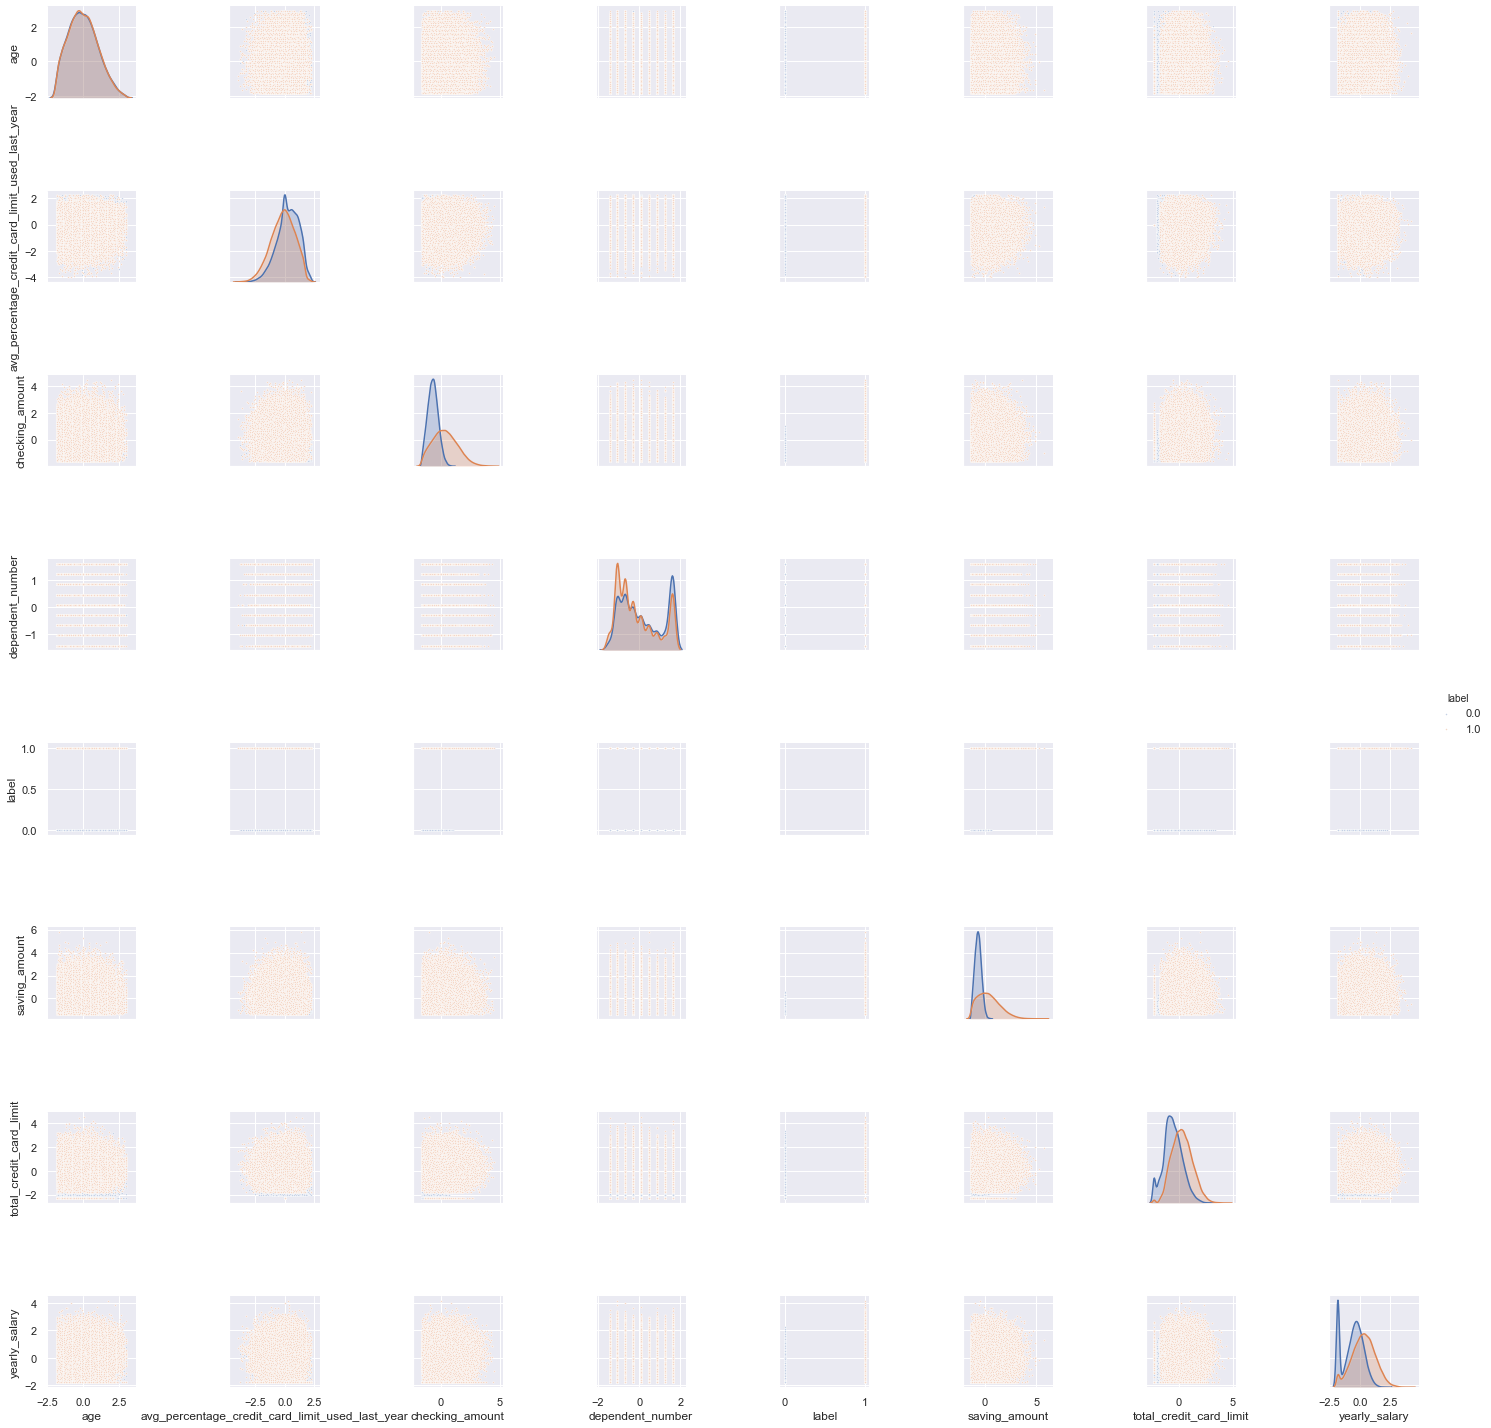

In [19]:
cont_pairwise = num_cols.difference(['fully_repaid_previous_loans', 'is_first_loan','is_employed',
       'loan_purpose_business', 'loan_purpose_emergency_funds','currently_repaying_other_loans',
       'loan_purpose_home', 'loan_purpose_investment', 'loan_purpose_other'])
sns.pairplot(cb_imp[cont_pairwise], hue="label",plot_kws={"s": 2})
plt.show()

In [49]:
predictors = num_cols.difference(['label', 'is_first_loan', 'yearly_salary'])



In [50]:
y = cb_imp['label']
X_train, X_test, y_train, y_test = train_test_split(cb_imp[predictors], y, test_size=0.4, random_state=42)

model_rf = random_forest_model(X_train, y_train)

[print(key, value) for key, value in model_evaluation(model_rf, X_test, y_test).items()]

Model <class 'sklearn.ensemble.forest.RandomForestClassifier'>
Score 0.9051516105340468
Precision 0.936783518856953
Recall 0.9150438169425511
F1_score 0.9257860602577785


[None, None, None, None, None]

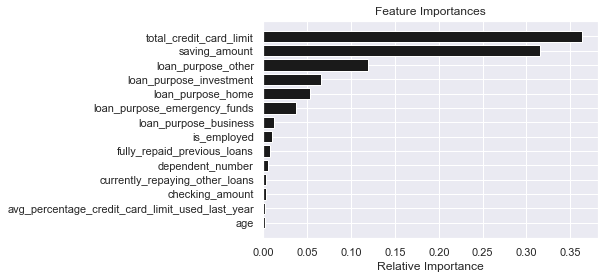

In [51]:
import matplotlib.pyplot as plt

importances = model_rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='k', align='center')
plt.yticks(range(len(indices)), predictors)
plt.xlabel('Relative Importance')
plt.show()

In [23]:
# just for reference, what a logistic model would perform
model_log = logistic_reg_model(X_train, y_train)

[print(key, value) for key, value in model_evaluation(model_log, X_test, y_test).items()]

Model <class 'sklearn.linear_model.logistic.LogisticRegression'>
Score 0.9013744622809778
Precision 0.9244838237684929
Recall 0.9228334956183057
F1_score 0.9236579225209128


[None, None, None, None, None]

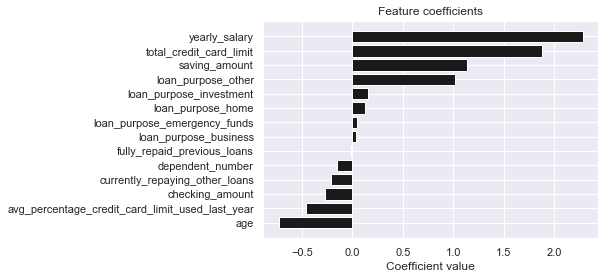

In [24]:
coef = model_log.coef_[0]
indices = np.argsort(coef)
plt.title('Feature coefficients')
plt.barh(range(len(indices)), coef[indices], color='k', align='center')
plt.yticks(range(len(indices)), predictors)
plt.xlabel('Coefficient value')
plt.show()

In [25]:
# calculate model profitability as defined in the problem description
def evaluate_profitability(repaid, pred):
    
    penalty = np.array(repaid) - 1
    
    return sum(np.array(pred)*np.array(repaid))+sum(np.array(pred)*penalty)

In [26]:
evaluate_profitability([1,0,1,0,1],[1,1,1,0,0])

1

In [27]:
# compare model profitability as defined in the problem description
test_idx = y_test.index
print('Profitibility\n Bank: {0} \n My model: {1}'.\
      format(evaluate_profitability(cb_imp.loc[test_idx,'loan_repaid'],cb_imp.loc[test_idx,'loan_granted']),\
     evaluate_profitability(y_test, model_rf.predict(X_test))))

Profitibility
 Bank: 5586.0 
 My model: 10784.0


In [28]:
print([sum(model_rf.predict(X_test)), sum(cb_imp.loc[test_idx,'loan_granted']), len(y_test),sum(cb_imp.loc[test_idx,'loan_repaid'])])

[12084.0, 19062, 19062, 12324.0]


In [29]:
metrics.precision_recall_fscore_support(cb_imp['loan_repaid'], cb_imp['loan_granted'], average='binary')

(0.6443530448650691, 1.0, 0.78371618172537, None)

In [30]:
len(cb_imp)*0.4

19061.600000000002

In [31]:
# now build a pipeline to train data again; add a feature selection (backward) process
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

pipe_rf = Pipeline([('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=200, max_depth=10), 
                                                          threshold='0.3*mean')),
                    ('rf', RandomForestClassifier())])
depth_range = [10, 15, 20]
estimator_range = [200, 300, 400]
param_grid = [{'rf__n_estimators': estimator_range,
              'rf__max_depth': depth_range}]
gs = GridSearchCV(estimator=pipe_rf,
                  param_grid=param_grid,
                  scoring='f1',
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9354550604744892
{'rf__max_depth': 15, 'rf__n_estimators': 400}


In [32]:
final_pipe = gs.best_estimator_

In [33]:
[print(key, value) for key, value in model_evaluation(final_pipe, X_test, y_test).items()]
print('Profitibility\n Bank: {0} \n My model: {1}'.\
      format(evaluate_profitability(cb_imp.loc[test_idx,'loan_repaid'], cb_imp.loc[test_idx,'loan_granted']),\
     evaluate_profitability(y_test,final_pipe.predict(X_test))))

Model <class 'sklearn.pipeline.Pipeline'>
Score 0.918581470989403
Precision 0.9455658504301787
Recall 0.927458617332035
F1_score 0.9364247091594298
Profitibility
 Bank: 5586.0 
 My model: 10772.0


In [34]:
# which feature(s) were not selected
sl = final_pipe['feature_selection']
sl.get_support()
print(X_train.columns.difference(X_train.columns[sl.get_support()]))
print(X_train.columns[sl.get_support()])

Index(['age', 'dependent_number', 'fully_repaid_previous_loans',
       'loan_purpose_business', 'loan_purpose_emergency_funds',
       'loan_purpose_home', 'loan_purpose_investment', 'loan_purpose_other'],
      dtype='object')
Index(['avg_percentage_credit_card_limit_used_last_year', 'checking_amount',
       'currently_repaying_other_loans', 'saving_amount',
       'total_credit_card_limit', 'yearly_salary'],
      dtype='object')


[0. 1.]


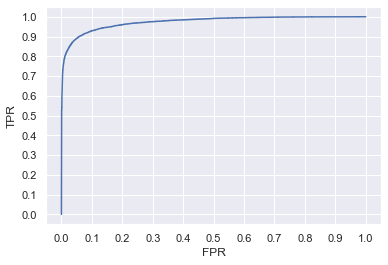

In [35]:
from sklearn.metrics import roc_curve

y_probas = final_pipe.predict_proba(X_test)
print(final_pipe.classes_)

fpr,tpr,thresholds = roc_curve(y_test,y_probas[:,1])
roc = pd.DataFrame({'FPR':fpr,'TPR':tpr,'Thresholds':thresholds})
plt.plot(roc.FPR,roc.TPR)
plt.xlabel("FPR")
plt.ylabel('TPR')
ticks = np.linspace(0,1,11)
plt.yticks(ticks)
plt.xticks(ticks)
plt.show()

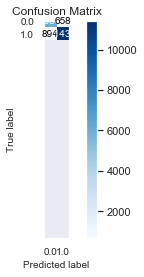

In [36]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, final_pipe.predict(X_test))
ax = plt.gca()
ax.set_ylim(len(num_cols)-0.2, 0)
plt.show()

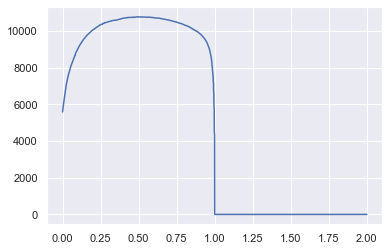

In [37]:
def calc_profits(repaids,probas,threshold):
    total_profit = 0
    for (repaid,proba) in zip(repaids,probas):
        if proba > threshold:
            total_profit += (1 if repaid == 1 else -1)
    return total_profit

# loan_valid = loan.loc[yvalid.index,:]
valid_profits = [ calc_profits(y_test,y_probas[:,1],threshold) for threshold in thresholds]

valid_threshold_profits = pd.DataFrame({'thresholds':thresholds,'profit':valid_profits})
plt.plot(thresholds, valid_profits)
plt.show()

In [38]:
valid_threshold_profits.loc[valid_threshold_profits.profit.idxmax(), :]

thresholds        0.491363
profit        10781.000000
Name: 1474, dtype: float64

[18:25:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stop_rounds, num_rounds, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.95554
Will train until train-auc hasn't improved in 30 rounds.
[1]	train-auc:0.96536
[2]	train-auc:0.97037
[3]	train-auc:0.97214
[4]	train-auc:0.97288
[5]	train-auc:0.97370
[6]	train-auc:0.97423
[7]	train-auc:0.97496
[8]	train-auc:0.97520
[9]	train-auc:0.97567
[10]	train-auc:0.97603
[11]	train-auc:0.97616
[12]	train-auc:0.97645
[13]	train-auc:0.97665
[14]	train-auc:0.97676
[15]	train-auc:0.97713
[16]	train-auc:0.97737
[17]	train-auc:0.97760
[18]	train-auc:0.97775
[19]	train-auc:0.97794
[20]	train-auc:0.97825
[21]	train-auc:0.97831
[22]	train-auc:0.97873
[23]	train-auc:0.97888
[24]	train-auc

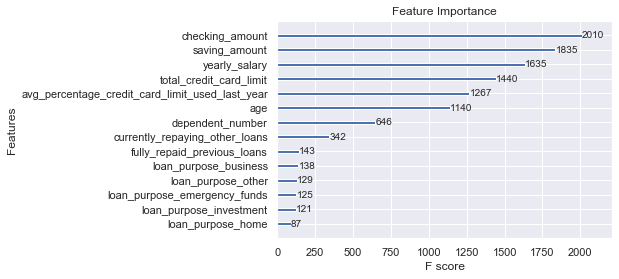

In [39]:
# what is the performance of xgboost in the reference solution on our dataset
import xgboost as xgb
######################

train_matrix = xgb.DMatrix(X_train,y_train)
test_matrix = xgb.DMatrix(X_test,y_test)

###############################
def train(params):
    params['silent'] = 0
    params['objective'] = 'binary:logistic'  # output probabilities
    params['eval_metric'] = 'auc'

    num_rounds = params["num_rounds"]
    early_stopping_rounds = params["early_stop_rounds"]

    # early stop will check on the last dataset
    watchlist = [(train_matrix, 'train')]
    bst = xgb.train(params, train_matrix, num_rounds, watchlist, early_stopping_rounds=early_stopping_rounds)

#     print("parameters: {}".format(params))
#     print("best {}: {:.2f}".format(params["eval_metric"], bst.best_score))

    return bst

params = {}
params["num_rounds"] = 300
params["early_stop_rounds"] = 30
# params['min_child_weight'] = 2

params['max_depth'] = 6
params['eta'] = 0.1
params["subsample"] = 0.8
params["colsample_bytree"] = 0.8

xgb_bst = train(params)
xgb.plot_importance(xgb_bst,title='Feature Importance')

ytest_probas = xgb_bst.predict(test_matrix, ntree_limit=xgb_bst.best_iteration)
yxgb = (ytest_probas > 0.5).astype(int)
yxgb_true = test_matrix.get_label()
pre_recal_fscore = metrics.precision_recall_fscore_support(yxgb_true, yxgb, average='binary')
print({'Precision': pre_recal_fscore[0],
            'Recall': pre_recal_fscore[1], 'F1_score': pre_recal_fscore[2]})


Xgboost profitability is 10777.0


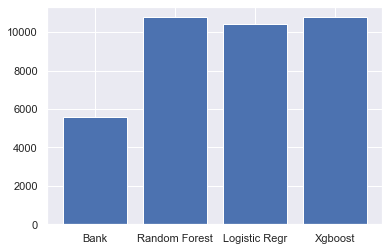

In [40]:
# compare different models on profitability
prof = [evaluate_profitability(cb_imp.loc[test_idx,'loan_repaid'], cb_imp.loc[test_idx,'loan_granted']),\
     evaluate_profitability(y_test,final_pipe.predict(X_test)),\
    evaluate_profitability(y_test,model_log.predict(X_test)),\
       evaluate_profitability(yxgb_true, yxgb)]
print('Xgboost profitability is {0}'.format(evaluate_profitability(yxgb_true, yxgb)))
x = np.arange(4)
plt.bar(x, prof)
plt.xticks(x, ('Bank', 'Random Forest', 'Logistic Regr', 'Xgboost'))
plt.show()

In [41]:
# what if we try to predict those rows that were not granted loan by the bank?

cb = ln.join(br.set_index('loan_id'), on='loan_id')
cb_not_grt = cb[mask]
cb_grt = cb[~mask]
cb_dummy_grt = pd.get_dummies(cb_grt[all_columns.difference(['label'])])
cb_dummy_not_grt = pd.get_dummies(cb_not_grt[all_columns.difference(['label'])])
cb_imp_not_grt = cb_dummy_not_grt.fillna(cb_dummy_grt.mean()) # use granted loan averages to fillna to keep consistency
cb_imp_grt = cb_dummy_grt.fillna(cb_dummy_grt.mean()) 
cb_imp_not_grt[predictors] = (cb_imp_not_grt[predictors] - cb_imp_grt[predictors].mean()) / cb_imp_grt[predictors].std() # normalize to granted loan normal distribution
cb_imp_not_grt.head(5)

,age,avg_percentage_credit_card_limit_used_last_year,checking_amount,currently_repaying_other_loans,dependent_number,fully_repaid_previous_loans,is_employed,is_first_loan,loan_granted,loan_id,loan_repaid,saving_amount,total_credit_card_limit,yearly_salary,loan_purpose_business,loan_purpose_emergency_funds,loan_purpose_home,loan_purpose_investment,loan_purpose_other
0,0.037085,5.107391e-01,1.292656,-2.804782e-13,1.238886,1.522717e-12,1,1,0,19454,0.644353,-0.355807,2.061716,0.979584,-0.540459,-0.440797,-0.567667,1.869309,-0.411850
1,0.037085,-1.023031e+00,1.064363,-2.804782e-13,0.475921,1.522717e-12,0,1,0,496811,0.644353,-1.259779,0.390938,-1.795719,-0.540459,-0.440797,-0.567667,1.869309,-0.411850
2,1.441406,2.396571e-14,-0.123965,-2.804782e-13,0.094438,1.522717e-12,1,1,0,929493,0.644353,-0.912252,-2.292434,-0.168605,-0.540459,-0.440797,-0.567667,-0.534946,2.428016
5,0.271139,6.811579e-01,-0.106797,-2.804782e-13,-0.287045,1.522717e-12,0,1,0,77085,0.644353,-0.665836,-0.773545,-1.795719,-0.540459,-0.440797,-0.567667,-0.534946,2.428016
9,-0.431022,2.214928e+00,-0.970318,2.267278e+00,-0.668527,4.852521e-01,0,0,0,422392,0.644353,-1.264466,-1.786138,-1.795719,1.850242,-0.440797,-0.567667,-0.534946,-0.411850


In [42]:
y_not_grt_pred = final_pipe.predict(cb_imp_not_grt[predictors])
sum(y_not_grt_pred)/len(y_not_grt_pred)

0.35192530778729936

In [43]:
cb_ngrt = cb_imp_not_grt[predictors]*cb_imp_grt[predictors].std() + cb_imp_grt[predictors].mean()
cb_ngrt[predictors].mean()

age                                                   41.462186
avg_percentage_credit_card_limit_used_last_year        0.742445
checking_amount                                     2890.037589
currently_repaying_other_loans                         0.355244
dependent_number                                       3.964880
fully_repaid_previous_loans                            0.899728
loan_purpose_business                                  0.204580
loan_purpose_emergency_funds                           0.193429
loan_purpose_home                                      0.237623
loan_purpose_investment                                0.203589
loan_purpose_other                                     0.160779
saving_amount                                       1601.008195
total_credit_card_limit                             3742.624331
yearly_salary                                      13686.844666
dtype: float64

In [44]:
cb_imp_grt[predictors].mean()

age                                                   41.524657
avg_percentage_credit_card_limit_used_last_year        0.700091
checking_amount                                     3499.160595
currently_repaying_other_loans                         0.297736
dependent_number                                       3.752445
fully_repaid_previous_loans                            0.902493
loan_purpose_business                                  0.226067
loan_purpose_emergency_funds                           0.162694
loan_purpose_home                                      0.243715
loan_purpose_investment                                0.222500
loan_purpose_other                                     0.145025
saving_amount                                       2022.366580
total_credit_card_limit                             4527.848659
yearly_salary                                      29245.991942
dtype: float64